### Support_Vector_Regression

### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns

### Load and read the dataset

In [2]:
df = pd.read_csv("Cars.csv")
X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values
df.sample(10)

,Car,Model,Volume,Weight,CO2
1,Mitsubishi,Space Star,1200,1160,95
21,Opel,Insignia,2000,1428,99
30,Mercedes,E-Class,2100,1605,115
24,Volvo,S60,2000,1415,99
18,Skoda,Rapid,1600,1119,104
17,Mazda,3,2200,1280,104
26,Audi,A4,2000,1490,104
22,Mercedes,C-Class,2100,1365,99
4,Mini,Cooper,1500,1140,105
8,Ford,Fiesta,1500,1112,98


In [3]:
df.head(10)

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [4]:
df.tail(10)

,Car,Model,Volume,Weight,CO2
26,Audi,A4,2000,1490,104
27,Audi,A6,2000,1725,114
28,Volvo,V70,1600,1523,109
29,BMW,5,2000,1705,114
30,Mercedes,E-Class,2100,1605,115
31,Volvo,XC70,2000,1746,117
32,Ford,B-Max,1600,1235,104
33,BMW,216,1600,1390,108
34,Opel,Zafira,1600,1405,109
35,Mercedes,SLK,2500,1395,120


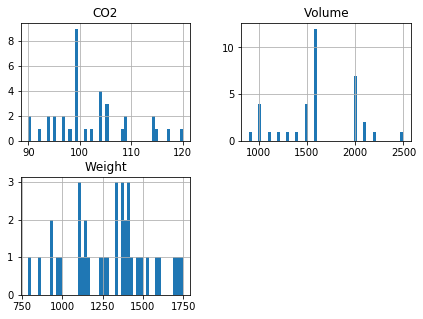

In [5]:
df.hist(bins = 50, figsize=(7,5))
plt.show()

In [6]:
df.shape

(36, 5)

### Basic insight of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


In [8]:
df.columns

Index(['Car', 'Model', 'Volume', 'Weight', 'CO2'], dtype='object')

In [9]:
df.dtypes

Car       object
Model     object
Volume     int64
Weight     int64
CO2        int64
dtype: object

### Descriptive Statistic

In [10]:
df.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Volume,36.0,1611.111111,388.975047,900.0,1475.00,1600.0,2000.00,2500.0
Weight,36.0,1292.277778,242.123889,790.0,1117.25,1329.0,1418.25,1746.0
CO2,36.0,102.027778,7.454571,90.0,97.75,99.0,105.00,120.0


### Handling Missing dat

In [12]:
missing_data = df.isnull()
missing_data

,Car,Model,Volume,Weight,CO2
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


### Check the number of missing_data per column

In [13]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Car
False    36
Name: Car, dtype: int64

Model
False    36
Name: Model, dtype: int64

Volume
False    36
Name: Volume, dtype: int64

Weight
False    36
Name: Weight, dtype: int64

CO2
False    36
Name: CO2, dtype: int64



In [14]:
df.corr()

,Volume,Weight,CO2
Volume,1.000000,0.753537,0.592082
Weight,0.753537,1.000000,0.552150
CO2,0.592082,0.552150,1.000000


### Continuous Numerical Variable


##### Check if Volume will be a better prediction of CO2

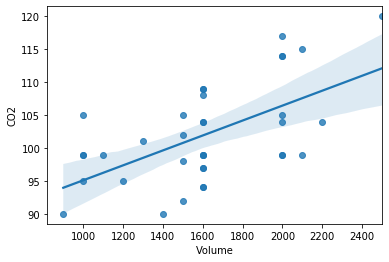

In [15]:
sns.regplot(x = "Volume", y = "CO2", data = df)

##### Check if Weight will be a better prediction of CO2

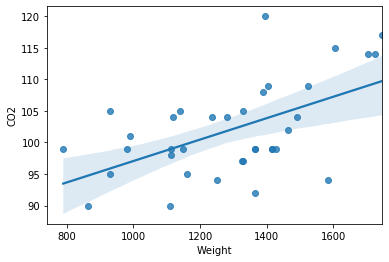

In [16]:
sns.regplot(x = "Weight", y = "CO2", data = df)

#### Categorical Data

**We want to check if Car will be a good prediction of CO2 by using boxplot**

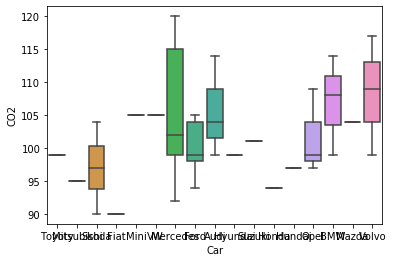

In [17]:
sns.boxplot(x = "Car", y = "CO2", data = df)

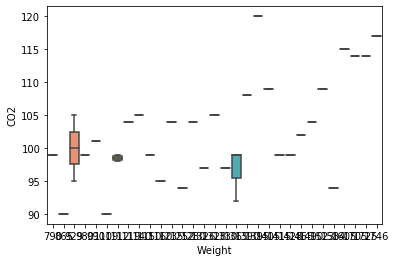

In [18]:
sns.boxplot(x = "Weight", y = "CO2", data = df)

#### Check the number of different cars in the Car by using value_counts() method

In [19]:
Car_value_count = df["Car"].value_counts()
Car_value_count[:10]

Mercedes      5
Ford          5
Skoda         4
BMW           3
Audi          3
Opel          3
Volvo         3
Toyoty        1
Mitsubishi    1
Honda         1
Name: Car, dtype: int64

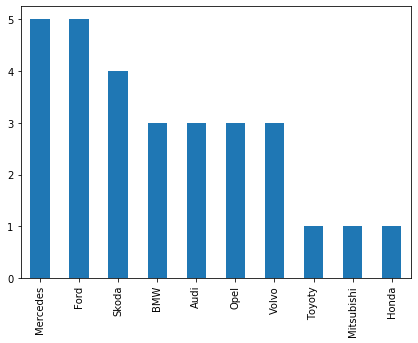

In [20]:
Car_value_count[:10].plot(kind = "bar", figsize=(7, 5))

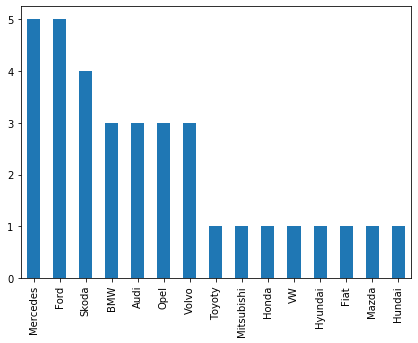

In [21]:
Car_value_count[:15].plot(kind = "bar", figsize=(7, 5))

### Declare the column to use as features

In [22]:
print(X)

[[ 790]
 [1160]
 [ 929]
 [ 865]
 [1140]
 [ 929]
 [1109]
 [1365]
 [1112]
 [1150]
 [ 980]
 [ 990]
 [1112]
 [1252]
 [1326]
 [1330]
 [1365]
 [1280]
 [1119]
 [1328]
 [1584]
 [1428]
 [1365]
 [1415]
 [1415]
 [1465]
 [1490]
 [1725]
 [1523]
 [1705]
 [1605]
 [1746]
 [1235]
 [1390]
 [1405]
 [1395]]


#### Declare the Prediction Target

In [23]:
print(y)

[ 99  95  95  90 105 105  90  92  98  99  99 101  99  94  97  97  99 104
 104 105  94  99  99  99  99 102 104 114 109 114 115 117 104 108 109 120]


In [24]:
y = y.reshape(len(y), 1)

In [25]:
print(y)

[[ 99]
 [ 95]
 [ 95]
 [ 90]
 [105]
 [105]
 [ 90]
 [ 92]
 [ 98]
 [ 99]
 [ 99]
 [101]
 [ 99]
 [ 94]
 [ 97]
 [ 97]
 [ 99]
 [104]
 [104]
 [105]
 [ 94]
 [ 99]
 [ 99]
 [ 99]
 [ 99]
 [102]
 [104]
 [114]
 [109]
 [114]
 [115]
 [117]
 [104]
 [108]
 [109]
 [120]]


### Features Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [27]:
print(X)

[[-2.10389253]
 [-0.55407235]
 [-1.52166278]
 [-1.78973979]
 [-0.63784641]
 [-1.52166278]
 [-0.76769621]
 [ 0.3046118 ]
 [-0.7551301 ]
 [-0.59595938]
 [-1.30803892]
 [-1.26615189]
 [-0.7551301 ]
 [-0.16871166]
 [ 0.14125238]
 [ 0.15800719]
 [ 0.3046118 ]
 [-0.05142797]
 [-0.72580918]
 [ 0.14962979]
 [ 1.2219378 ]
 [ 0.5685001 ]
 [ 0.3046118 ]
 [ 0.51404696]
 [ 0.51404696]
 [ 0.72348212]
 [ 0.8281997 ]
 [ 1.81254495]
 [ 0.96642691]
 [ 1.72877089]
 [ 1.30990057]
 [ 1.90050772]
 [-0.23991961]
 [ 0.40932938]
 [ 0.47215993]
 [ 0.4302729 ]]


In [28]:
print(y)

[[-0.41192538]
 [-0.95612037]
 [-0.95612037]
 [-1.63636411]
 [ 0.40436711]
 [ 0.40436711]
 [-1.63636411]
 [-1.36426661]
 [-0.54797412]
 [-0.41192538]
 [-0.41192538]
 [-0.13982788]
 [-0.41192538]
 [-1.09216911]
 [-0.68402287]
 [-0.68402287]
 [-0.41192538]
 [ 0.26831836]
 [ 0.26831836]
 [ 0.40436711]
 [-1.09216911]
 [-0.41192538]
 [-0.41192538]
 [-0.41192538]
 [-0.41192538]
 [-0.00377913]
 [ 0.26831836]
 [ 1.62880584]
 [ 0.9485621 ]
 [ 1.62880584]
 [ 1.76485459]
 [ 2.03695208]
 [ 0.26831836]
 [ 0.81251335]
 [ 0.9485621 ]
 [ 2.44509833]]


### Train the SVR on the whole dataset

In [29]:
from sklearn.svm import SVR
regressor = SVR(kernel = "rbf")
regressor.fit(X, y)

C:\Users\peter\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Predict the New Results

In [30]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[790]])))

array([98.87982643])

### Visualise the SVR Results

Text(0, 0.5, 'CO2')

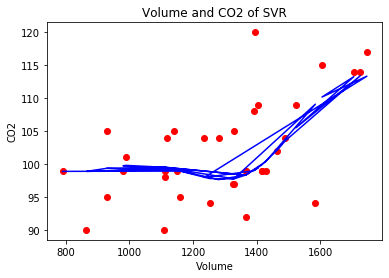

In [31]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = "red")
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = "blue")
plt.title("Volume and CO2 of SVR")
plt.xlabel("Volume")
plt.ylabel("CO2")

### Visualise the SVR Results for Higher Resolution and Smoother Curve

Text(0, 0.5, 'CO2')

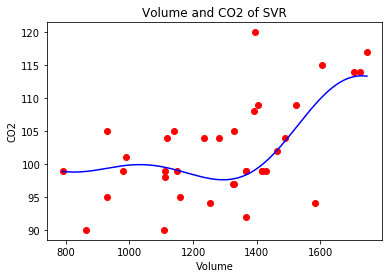

In [32]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title("Volume and CO2 of SVR")
plt.xlabel("Volume")
plt.ylabel("CO2")

### Evaluating the Model Performance